In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Unit 03 Assessment

In Unit 03, we modeled systems that evolve in time. These types of models are called *dynamic models*. In this unit, the learning goals are to:

- use a dynamic model to make predictions in areas of study like population dynamics, personal finance, and transmission of infectious diseases.
- write a dynamic model if given the initial value and rate of change of a variable.
- modify a dynamic model to include new or different kinds of interactions or variables.
- compare predictions of a dynamic model to measured data.

## Grading

- Exercise 1 -- 45 points
- Exercise 2 -- 10 points
- Exercise 3 -- 10 points
- Exercise 4 -- 10 points

## Instructions

- Do the exercises below. 
- Add additional code cells or markdown cells as necessary. 
- Provide your answers to questions in narrative form (i.e. complete sentences) below each question. You can edit the markdown cells. 
- I should be able to find the code you used for all calculations. **You may not use a calculator. All calculations must be done in Python.**
- You may use our textbook and your Google Colab notebooks.

# Exercise 1

Strontium-90 atoms decay through emission of electrons. This particular decay process is called beta decay. 

A single strontium-90 atom decays into a electron, an antineutrino, and a yttrium-90 atom. If $Q$ represents the number of strontium-90 atoms in a sample, the rate of change of $Q$ is

$$rate= \frac{\Delta Q}{\Delta t} = -r Q$$

where the decay rate constant is $r=0.0241$ in units of $1/year$.

Compute and graph $Q$ up to 10 years, using a time step of 0.01 year and an initial number of 1,000 strontium-90 atoms.

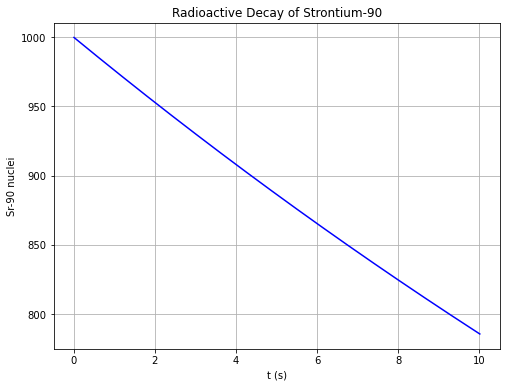

At t = 10.0, Q = 785.6. The percent of strontium-90 atoms remaining in the sample is 78.6%


In [58]:
Q = 1000
r = 0.0241

dt = 0.01
t = 0

tmodel = []
Qmodel = []

while t < 10:
    rate = -r*Q
    Q = Q + rate*dt
    
    t = t + dt
    
    tmodel.append(t)
    Qmodel.append(Q)

fig = plt.figure(figsize=(8,6))
plt.title("Radioactive Decay of Strontium-90")
plt.xlabel("t (s)")
plt.ylabel("Sr-90 nuclei")
plt.plot(tmodel, Qmodel, 'b-')
plt.grid()
plt.show()    

print("At t = {:.1f}, Q = {:.1f}. The percent of strontium-90 atoms remaining in the sample is {:.1f}%".format(t,Q,Q/1000*100))

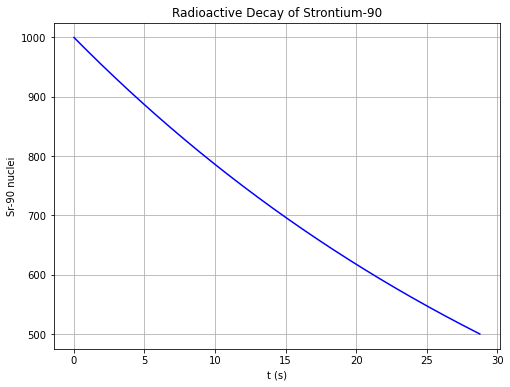

At t = 28.8, Q = 500.0. The percent of strontium-90 atoms remaining in the sample is 50.0%


In [56]:
Q = 1000
r = 0.0241

dt = 0.01
t = 0

tmodel = []
Qmodel = []

while Q > 500:
    rate = -r*Q
    Q = Q + rate*dt
    
    t = t + dt
    
    tmodel.append(t)
    Qmodel.append(Q)

fig = plt.figure(figsize=(8,6))
plt.title("Radioactive Decay of Strontium-90")
plt.xlabel("t (s)")
plt.ylabel("Sr-90 nuclei")
plt.plot(tmodel, Qmodel, 'b-')
plt.grid()
plt.show()    

print("At t = {:.1f}, Q = {:.1f}. The percent of strontium-90 atoms remaining in the sample is {:.1f}%".format(t,Q,Q/1000*100))

1. What percentage of the initial sample of strontium-90 atoms remain (i.e. have not decayed) at $t=10$ years?

  After 10 years, 78.6% of atoms remain undecayed.
  

2. Scientists often report the decay rate of radioactive isotopes in terms of its *half-life* which is the time required for half of the initial sample to decay. What is the half-life of strontium-90?

  The half-life os Sr-90 is 28.8 years.
  

## Exercise 2

Your friend, Julia, is evaluating two different types of student loans and asks you for advice. She needs to borrow $\$20,000$. Her options are:

**Loan A**

Pay $\$150$ per month at a fixed interest rate of 5% compounded monthly.

**Loan B**

Pay $\$150$ per month at a fixed interest rate of 3% compounded monthly for four years. After 4 years, pay $\$150$ per month at a fixed interest rate of 7%.



1. Which loan do you recommend if her goal is to save as much money as possible?

With Loan A, she will pay $\$9254$ in interest. With Loan B, she will pay $\$9554$ in interest. I recommend Loan A.

2. How long will it take to pay off her preferred loan?

It takes around 16.3 years to pay off her loan.

In [7]:
# Loan A
P = 20000
r = 0.05
dt = 1/12
t = 0
Itotal = 0

tdata = []
Pdata = []
Idata = []

while P>0:
    I = r *P*dt #interest paid for one month
    Ppaid = 150 - I
    P  = P - Ppaid
    Itotal = Itotal + I

    t = t + dt
    
    tdata.append(t)
    Pdata.append(Ppaid)
    Idata.append(I)

print("After t = {:.2f} years, P = ${:.2f} and the total interest paid = ${:.2f}.".format(t, P, Itotal))

total_paid_A = 20000+Itotal
print("Loan A: She will pay a total of principal and interest = ${:.0f}.".format(total_paid_A))



After t = 16.33 years, P = $-145.73 and the total interest paid = $9254.27.
Loan A: She will pay a total of principal and interest = $29254.


In [8]:
# Loan B
P = 20000
r = 0.03
dt = 1/12
t = 0
Itotal = 0

tdata = []
Pdata = []
Idata = []

while P>0:
    if (t>4):
        r = 0.07

    I = r *P*dt #interest paid for one month
    Ppaid = 150 - I
    P  = P - Ppaid
    Itotal = Itotal + I

    t = t + dt
    
    tdata.append(t)
    Pdata.append(Ppaid)
    Idata.append(I)

print("After t = {:.2f} years, P = ${:.2f} and the total interest paid = ${:.2f}.".format(t, P, Itotal))

total_paid_A = 20000+Itotal
print("Loan A: She will pay a total of principal and interest = ${:.0f}.".format(total_paid_A))



After t = 16.50 years, P = $-145.51 and the total interest paid = $9554.49.
Loan A: She will pay a total of principal and interest = $29554.


## Exercise 3

Newton's law of cooling describes how a substance (such as hot coffee for example) cools due to conduction with its surroundings. Suppose the temperature of the surroundings is $20^\circ \mathrm{C}$ and the temperature $T$ of coffee in a mug changes at a rate

$$rate = \frac{\Delta T}{\Delta t} = -k(T-20)$$

where $k=0.1$ in units of $1/minute$ and $T$ is in degrees celsius.

You have a hot cup of coffee that is initially at $T=80^\circ \mathrm{C}$. Using a time step of 1.0 s, calculate and plot the temperature of the coffee as a function of time for one hour. (Use a unit for time in minutes, and convert your time step to minutes, knowing that there are 60 s in one minute.)

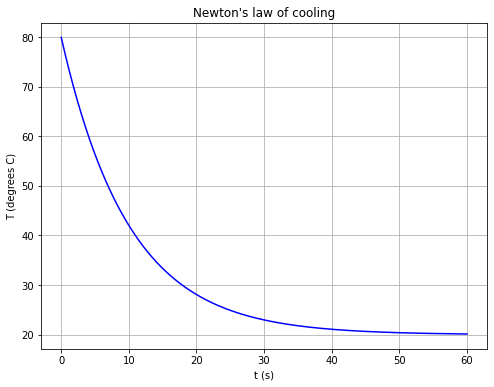

After t = 60.02 minutes, T = $20.15 degrees celsius.


In [3]:
T = 80
k = 0.1
t = 0
dt = 1/60

tmodel = []
Tmodel = []

while t < 60:
    rate = -k*(T-20)
    T = T + rate*dt
    
    t = t + dt
    
    tmodel.append(t)
    Tmodel.append(T)

fig = plt.figure(figsize=(8,6))
plt.title("Newton's law of cooling")
plt.xlabel("t (s)")
plt.ylabel("T (degrees C)")
plt.plot(tmodel, Tmodel, 'b-')
plt.grid()
plt.show()    

    
print("After t = {:.2f} minutes, T = {:.2f} degrees celsius.".format(t, T))


1. What is the temperature of the coffee at $t=5$ minutes? (Modify your program so you can answer precisely. Do not estimate by reading the graph.)
  
  After 5 minutes, the coffee is 56.3 degrees celsius.
  
2. How long does it take for the temperature to be at $40^\circ C$?  (Modify your program so you can answer precisely. Do not estimate by reading the graph.)

  It takes 11 minutes to reach 40 degrees celsius.

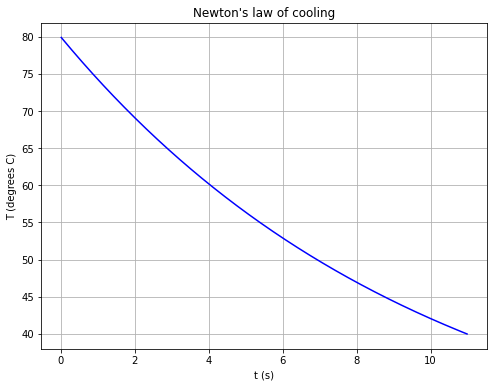

After t = 10.98 minutes, T = $39.99 degrees celsius.


In [5]:
T = 80
k = 0.1
t = 0
dt = 1/60

tmodel = []
Tmodel = []

while T > 40:
    rate = -k*(T-20)
    T = T + rate*dt
    
    t = t + dt
    
    tmodel.append(t)
    Tmodel.append(T)

fig = plt.figure(figsize=(8,6))
plt.title("Newton's law of cooling")
plt.xlabel("t (s)")
plt.ylabel("T (degrees C)")
plt.plot(tmodel, Tmodel, 'b-')
plt.grid()
plt.show()    

    
print("After t = {:.2f} minutes, T = {:.2f} degrees celsius.".format(t, T))


## Exercise 4

Start by copying and pasting your program from the previous exercise. If you did not complete Exercise 3, then skip this one.

**In this exercise, you will investigate the effect on the temperature of the system by adding cream to your coffee.**

One minute after the coffee has cooled, you pour a mass of $m_{cream}=20$ grams and temperature $T_{cream}=5^\circ \mathrm{C}$ into your coffee which has a mass $m_{coffee}=100$ grams. After you pour the milk into the coffee, the coffee will quickly have a new temperature of:

$$T_{new} = \frac{100T_{old} + 20*5}{100+20}$$

To change the temperature suddenly at $t=1$ minute to this new value, you will need an `if` statement like this one inside your loop:

```
if (t > 1 - dt/2) and (t < 1 + dt/2):
    T = 
```

where `dt` is the variable used for the time step.

1. What is the temperature of the coffee (with cream) at $t=5$ minutes?

  The temperature of the coffee with cream at 5 minutes is 48.6 degrees celsius.

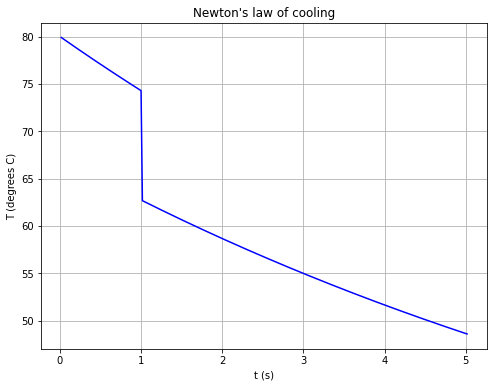

After t = 5.02 minutes, T = $48.59 degrees celsius.


In [80]:
T = 80
k = 0.1
t = 0
dt = 1/60

tmodel = []
Tmodel = []

while t < 5:
    
    if (t > 1 - dt/2) and (t < 1 + dt/2):
        T = (100*T + 20*5)/(100+20)

    rate = -k*(T-20)
    T = T + rate*dt
    
    t = t + dt
    
    tmodel.append(t)
    Tmodel.append(T)

fig = plt.figure(figsize=(8,6))
plt.title("Newton's law of cooling")
plt.xlabel("t (s)")
plt.ylabel("T (degrees C)")
plt.plot(tmodel, Tmodel, 'b-')
plt.grid()
plt.show()    

    
print("After t = {:.2f} minutes, T = {:.2f} degrees celsius.".format(t, T))


2. Now, you repeat the experiment but this time you wait until $t=4$ minutes to add the cream to your coffee. What is the temperature of the coffee (with cream) at $t=5$ minutes?

  In this case, the temperature after five minutes is 48.0 degrees celsius.

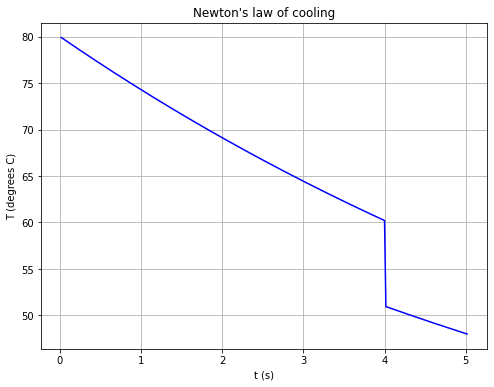

After t = 5.02 minutes, T = $48.01 degrees celsius.


In [81]:
T = 80
k = 0.1
t = 0
dt = 1/60

tmodel = []
Tmodel = []

while t < 5:
    
    if (t > 4 - dt/2) and (t < 4 + dt/2):
        T = (100*T + 20*5)/(100+20)

    rate = -k*(T-20)
    T = T + rate*dt
    
    t = t + dt
    
    tmodel.append(t)
    Tmodel.append(T)

fig = plt.figure(figsize=(8,6))
plt.title("Newton's law of cooling")
plt.xlabel("t (s)")
plt.ylabel("T (degrees C)")
plt.plot(tmodel, Tmodel, 'b-')
plt.grid()
plt.show()    

    
print("After t = {:.2f} minutes, T = ${:.2f} degrees celsius.".format(t, T))


3. If your goal is to drink your coffee as hot as possible at $t=5$ minutes, after adding the cream, should you add the cream earlier then the coffee is hot or later when the coffee has cooled?

  You should add the cream immediately. This is because the rate of change in temperature is proportional to temperature. So you get a larger drop in temperature when the temperature is hot. So if you are going to cool your coffee by adding cream, add it at the beginning so that the rate of change in temperature will also decrease and the coffee will not cool as fast.